In [ ]:
# Import the libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
# Upload the data
from google.colab import files
uploded = files.upload()

Saving BeerWineLiquor.csv to BeerWineLiquor (2).csv


In [ ]:
# Get the data
df = pd.read_csv("BeerWineLiquor.csv")

In [ ]:
# Look at the data
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [ ]:
# Get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
# Change the name of columns a/c to prophet demand
df.columns = ["ds", "y"]
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [ ]:
# Changing ds as a datetime object
df["ds"] = pd.to_datetime(df["ds"])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
# Creating a model
m = Prophet()

m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Creating a placeholder to hold our future prediction
future = m.make_future_dataframe(periods = 24, freq = "MS", include_history = True)
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [ ]:
# Predicting and filling the future data for y
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1139.373812,1467.141443,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1191.909345,1496.891380,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1435.461218,1763.172388,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1405.843763,1739.466751,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1650.465615,1972.797550,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [ ]:
# Look at all the columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
# Get the important columns
forecast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(10)

,ds,yhat_lower,yhat_upper,yhat
338,2020-03-01,4786.996239,5109.755198,4943.299086
339,2020-04-01,4774.321171,5103.969287,4941.866893
340,2020-05-01,5031.365291,5369.182100,5198.382732
341,2020-06-01,5010.338060,5330.814704,5178.976562
342,2020-07-01,5147.021913,5467.181723,5311.178497
343,2020-08-01,5070.996214,5403.740759,5240.705951
344,2020-09-01,4924.481762,5249.897398,5083.568322
345,2020-10-01,5017.754320,5347.684004,5189.273100
346,2020-11-01,5170.648634,5503.130271,5336.429469
347,2020-12-01,6169.405112,6494.160142,6334.992675


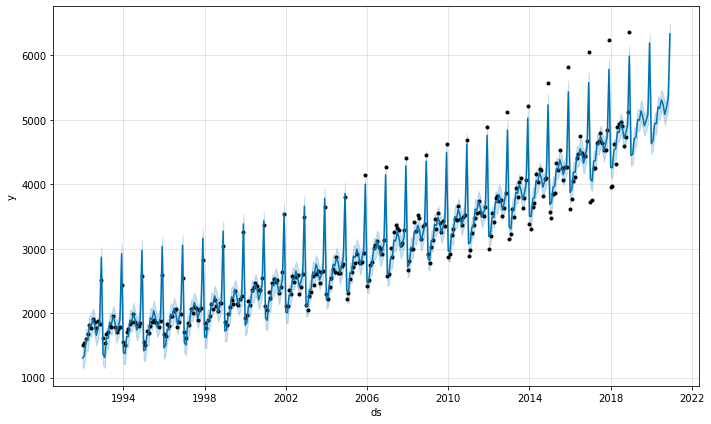

In [ ]:
# Plot the forecast
m.plot(forecast);

(735234.0, 737791.0)

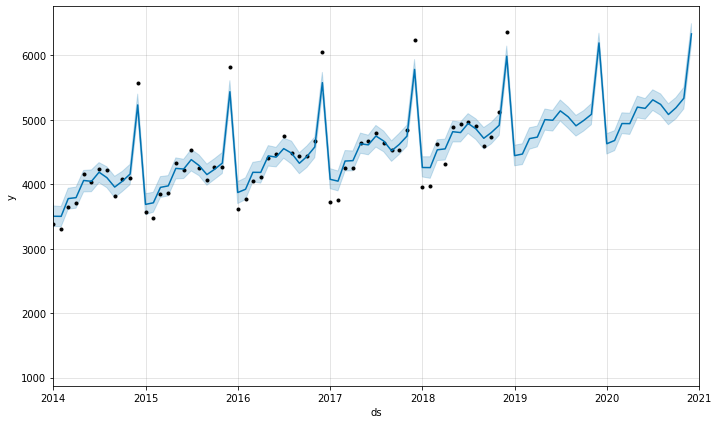

In [ ]:
# Get a closer look at the forecast 
m.plot(forecast);
plt.xlim(datetime.date(2014, 1, 1), datetime.date(2021, 1, 1))

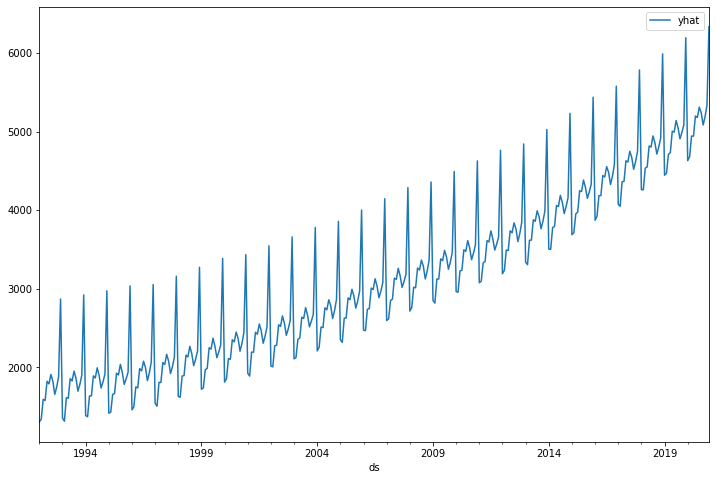

In [ ]:
# Look at the forecast plot without original points
forecast.plot(x = "ds", y = "yhat", figsize = (12, 8))

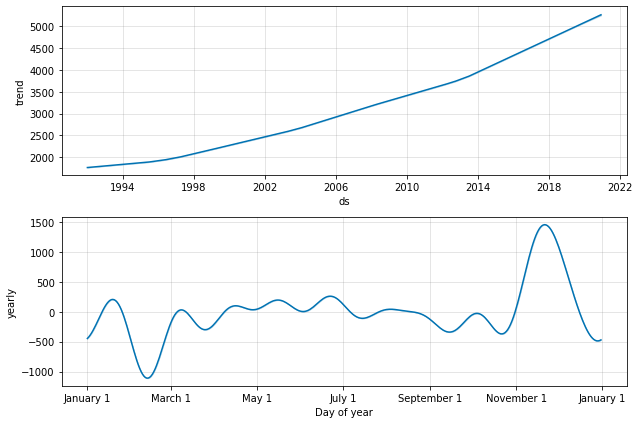

In [ ]:
# Take a look at the plot components
m.plot_components(forecast);